# Color Palette Analysis

This notebook provides an example use case of the image processing tools made.

Notes to self: perhaps import color wheel, and see how well I fit any color theory stuff? i.e complementary colors, triad, etc.

In [1]:
# import the necessary packages for image processing, data manipulation, etc. 
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import cv2
from mpl_toolkits.mplot3d import Axes3D

# specify sample image directories
samples = 'Sample Images/'
campus_samples = 'Sample Images/02.24.2020 Campus Export/'

# some handy links
# Histograms
# https://answers.opencv.org/question/8967/java-api-histogram-calculation/
# https://docs.opencv.org/2.4/modules/imgproc/doc/histograms.html


(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

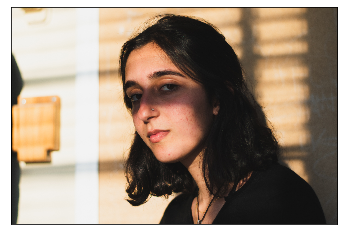

In [2]:
image1 = cv2.imread(campus_samples + 'DSC_0250.jpg', 1)
plt.imshow(image1[:,:,::-1])
plt.xticks([]), plt.yticks([])


# Histograms
The histogram is one of the photographer's most powerful tools. However, there's a rather steep learning curve in learning how to really use the histogram to optimize for certain looks and effects.

Here's the histogram of our image above.

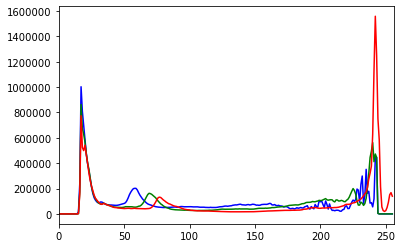

In [3]:
for i, rgb_color in enumerate(['b', 'g', 'r']):
    color_hist = cv2.calcHist([image1], [i], None, [256], [0, 256])
    plt.plot(color_hist, color=rgb_color)
plt.xlim([0, 256])
plt.show()

# Let's do some more plotting.
We'd like to plot each of the pixels of our image in a 3D graph with axes representing the red, blue, and green channels. This is a bit tough, however, since most of our photos will have lots of data points. We'll make the image a bit smaller first, then plot the distribution.

In [4]:
# fig = plt.figure()
# dist = fig.add_subplot(111, projection='3d')
# blues = image1[:,:,0]
# greens = image1[:,:,1]
# reds = image1[:,:,2]
# dist.scatter(reds, greens, blues, zdir='z', s=2, c=None)

# Let's analyze the different color techniques used.
But first, lets change the way we present our colors. OpenCV gives us the color values of each pixel in terms of their BGR (Blue, Green, Red) values, but when analyzing color techniques, it's much easier for us to work with HSL (Hue, Saturation, Lightness). OpenCV offers native support for switching between the BGR and HSV colorspaces, but HSL is more commonly known amongst photographers so we'll stick to that.

In [ ]:
# Non-destructively takes in an image in the BGR colorspace and creates the same image in the HSL colorspace.
# Parameters:
# image: an m x n x 3 ndarray with the third dimension representing colors in the BGR format.
# Output:
# new_image: an m x n x 3 ndarray with the third dimension representing colors in the HSL format.
# https://stackoverflow.com/questions/39118528/rgb-to-hsl-conversion
def bgr_to_hsl(image):
    hsl_image = image.copy()
    hsl_image = np.true_divide(hsl_image, 255)
    for i in range(hsl_image.shape[0]):
        for j in range(hsl_image.shape[1]):
            b, g, r = hsl_image[i, j, 0], hsl_image[i, j, 1], hsl_image[i, j, 2]
            M = max(b, g, r)
            m = min(b, g, r)
            chroma = M - m
            if chroma == 0:
                hue = 0
            elif M == r:
                hue = ((g - b) / chroma) % 6
            elif M == g:
                hue = ((b - r) / chroma) + 2
            else:
                hue = ((r - g) / chroma) + 4
            hue *= 60
            lightness = 0.5 * (M + m)
            if lightness == 1 or lightness == 0:
                saturation = 0
            else:
                saturation = chroma / (1 - abs(2 * lightness - 1))
            hsl_image[i, j, :] = [hue, saturation, lightness]
    return hsl_image

print(bgr_to_hsl(image1))